In [1]:
#DB Connection 
import pymssql
import pandas as pd
import pyodbc
import numpy as np
conn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                     "Server=Martin-PC\SQLEXPRESS;"
                     "Database=FootballData;"
                     "Trusted_Connection=yes;")
#conn = pymssql.connect(server="localhost", user="",password="", port=63642)  # You can lookup the port number inside SQL server. 

data_folder = 'DataAnalysisFootball/data/'

In [2]:
#Matches select
stmt = """SELECT  Teams.FullName as HomeTeam, Teams2.FullName as AwayTeam, 
        Teams.ExternalId as HomeTeamId, Teams2.ExternalId as AwayTeamId
	  ,[Matches].ExternalId as ExternalId
      ,[Date]
      ,[Country]
      ,[League]
      ,[Season]
      ,[Stage]
      ,[AwayTeam_Id]
      ,[HomeTeam_Id]
FROM  [FootballData].[dbo].[Matches]
LEFT JOIN [Teams] ON Matches.HomeTeam_Id = Teams.Id
LEFT JOIN [Teams] as Teams2 ON Matches.AwayTeam_Id = Teams2.Id"""
# Excute Query here
df_matches = pd.read_sql(stmt,conn)
df_matches.drop_duplicates(['ExternalId'], inplace=True)
df_matches['Date']=pd.to_datetime(df_matches['Date'])
print(df_matches.shape)
df_matches.head(10)

(7750, 12)


,HomeTeam,AwayTeam,HomeTeamId,AwayTeamId,ExternalId,Date,Country,League,Season,Stage,AwayTeam_Id,HomeTeam_Id
0,Leicester,Everton,8197,8668,1723984,2014-08-18 15:00:00,England,Premier League,2014/2015,1,13,9
1,Burnley,Chelsea,8191,8455,1723983,2014-08-18 15:00:00,England,Premier League,2014/2015,1,14,10
2,Liverpool,Southampton,8650,8466,1723985,2014-08-18 15:00:00,England,Premier League,2014/2015,1,15,12
3,Arsenal,Crystal Palace,9825,9826,1723982,2014-08-18 15:00:00,England,Premier League,2014/2015,1,16,11
4,Manchester United,Swansea,10260,10003,1723986,2014-08-18 15:00:00,England,Premier League,2014/2015,1,26,25
5,Newcastle United,Manchester City,10261,8456,1723987,2014-08-18 15:00:00,England,Premier League,2014/2015,1,28,27
6,Stoke,Aston Villa,10194,10252,1723989,2014-08-18 15:00:00,England,Premier League,2014/2015,1,34,33
7,Queens Park Rangers,Hull,10172,8667,1723988,2014-08-18 15:00:00,England,Premier League,2014/2015,1,36,35
8,West Bromwich Albion,Sunderland,8659,8472,1723990,2014-08-18 15:00:00,England,Premier League,2014/2015,1,38,37
9,West Ham,Tottenham,8654,8586,1723991,2014-08-18 15:00:00,England,Premier League,2014/2015,1,40,39


In [3]:
df_matches['Date'].min()

Timestamp('2014-08-10 15:00:00')

In [4]:
df_matches['Date'].max()

Timestamp('2019-05-12 14:00:00')

In [5]:
#Shots on select
stmt = "SELECT * FROM ShotOns"
# Excute Query here
df_shots_on = pd.read_sql(stmt,conn)
#df_corners = df_corners['Minute'].notnull()
print(df_shots_on.shape)
df_shots_on.drop_duplicates(['ExternalId'], inplace=True)

#Shots off select
stmt = "SELECT * FROM ShotOffs"
# Excute Query here
df_shots_off = pd.read_sql(stmt,conn)
#df_corners = df_corners['Minute'].notnull()
print(df_shots_off.shape)
df_shots_off.drop_duplicates(['ExternalId'], inplace=True)

#Possessions select
stmt = "SELECT * FROM Possessions"
# Excute Query here
df_possessions = pd.read_sql(stmt,conn)
#df_corners = df_corners['Minute'].notnull()
print(df_possessions.shape)
df_possessions.drop_duplicates(['ExternalId'], inplace=True)
df_possessions.replace('', np.nan, inplace=True)
df_possessions.dropna(axis=0, how='any', inplace=True)

df_possessions['HomePossession'] = df_possessions['HomePossession'].astype(int)
df_possessions['AwayPossession'] = df_possessions['AwayPossession'].astype(int)
df_possessions['Minute'] = df_possessions['Minute'].astype(int)
#df_possessions['TeamId'] = df_possessions['TeamId'].astype(str)
df_possessions.sample(5)


(83999, 6)
(82698, 6)
(104795, 7)


,Id,ExternalId,MatchId,Minute,HomePossession,AwayPossession,TeamId
103674,103675,8428072,2782011,75,52,48,0
80605,80606,6676902,2300862,60,75,25,0
32633,32634,7411474,2525249,65,54,46,0
16236,16237,7739688,2523034,30,35,65,0
69262,69263,7902563,2588662,20,41,59,0


In [6]:
#Goals select
stmt = "SELECT * FROM Goals"
# Excute Query here
df_goals = pd.read_sql(stmt,conn)
print(df_goals.shape)
df_goals.drop('Id', inplace=True, axis=1)
df_goals.drop_duplicates(inplace=True)
print(df_goals.shape)

(22244, 8)
(21986, 7)


In [7]:
#Teams select
stmt = "SELECT * FROM Teams"
# Excute Query here
df_teams = pd.read_sql(stmt,conn)
print(df_teams.shape)
df_teams.head(2)
#df_teams.count

(15807, 4)


,Id,ExternalId,FullName,Acronym
0,1,9825,Arsenal,ARS
1,2,8650,Liverpool,LIV


In [8]:
#Corners select
stmt = "SELECT * FROM Corners"
# Excute Query here
df_corners = pd.read_sql(stmt,conn)
#df_corners = df_corners['Minute'].notnull()
print(df_corners.shape)
df_corners.drop_duplicates(['ExternalId'], inplace=True)
df_corners.sample(30)

(78204, 6)


,Id,ExternalId,MatchId,Minute,Player1,TeamId
60047,60048,4106274,1778240,45,51953,9783
56568,56569,7679195,2588579,7,304733,8564
71180,71181,7543623,2580733,61,37824,8603
2979,2980,4390072,1724319,90,26675,8466
55163,55164,7370202,2588453,60,325916,9885
75381,75382,8883947,2782138,81,139671,8197
46707,46708,4708886,2060262,52,293235,8540
75319,75320,8869225,2782132,87,230190,8654
62010,62011,3749693,1778068,69,33635,9906
59614,59615,4070983,1778207,85,184533,9906


(72300, 5)
      TeamId  MatchId  Minute  count    FullName
0       None  1709701       3      1        None
1       None  1709706      79      1        None
2       None  1709727      50      1        None
3       None  1709728      10      1        None
4       None  1709734      53      1        None
65     10003  1724000       4      1    Atalanta
66     10003  1724000      77      1    Atalanta
67     10003  1724013      23      1    Atalanta
68     10003  1724013      55      2    Atalanta
69     10003  1724013      76      1    Atalanta
670    10167  1785971      34      1       Lazio
671    10167  1785971      45      1       Lazio
672    10167  1785971      50      1       Lazio
673    10167  1785971      60      1       Lazio
674    10167  1785971      64      1       Lazio
814    10172  1723988      17      1        Roma
815    10172  1723988      43      1        Roma
816    10172  1723988      44      1        Roma
817    10172  1723988      45      1        Roma
818    10

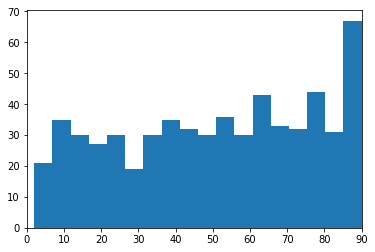

Lazio


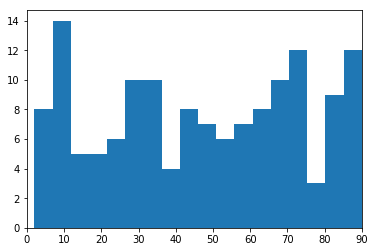

Roma


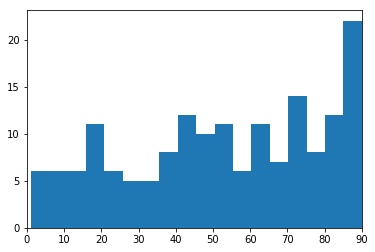

Chievo


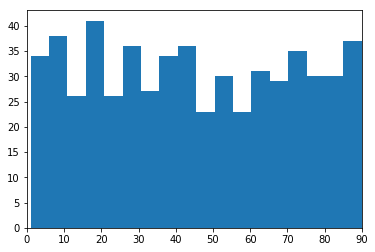

Sampdoria


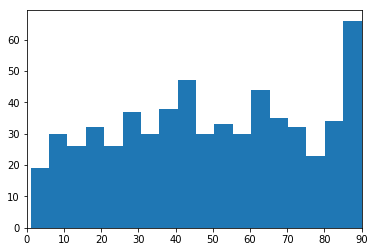

Torino


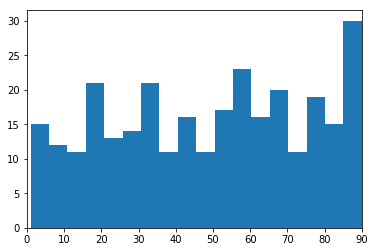

Chievo


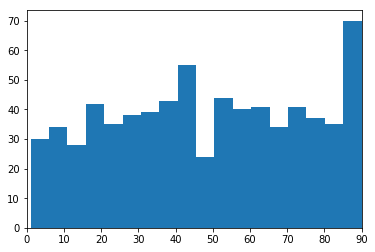

SSC Napoli


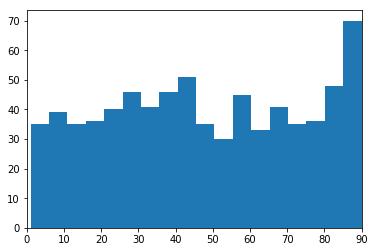

Sassuolo


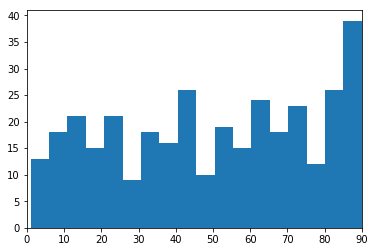

Fiorentina


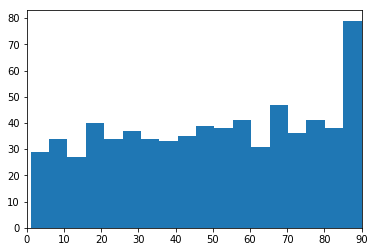

SSC Napoli


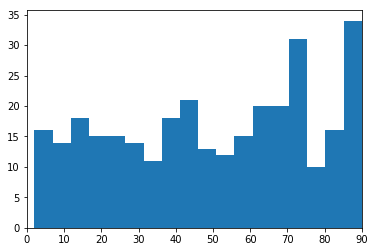

Carpi


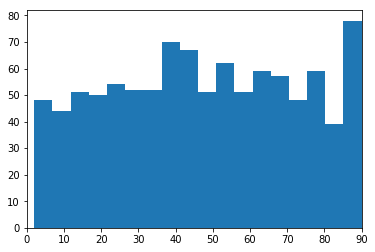

Atalanta


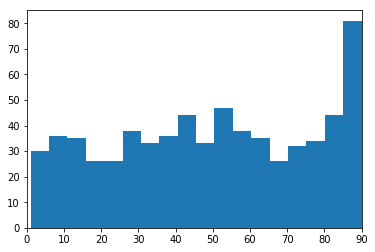

Verona


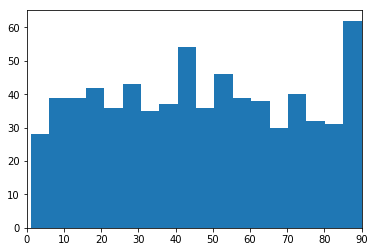

Chievo


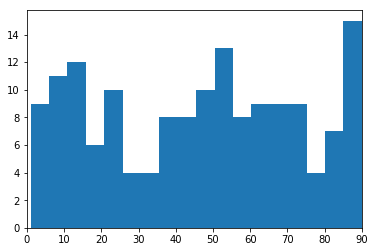

Genoa


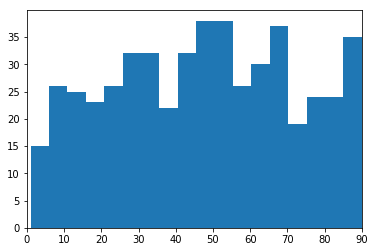

Carpi


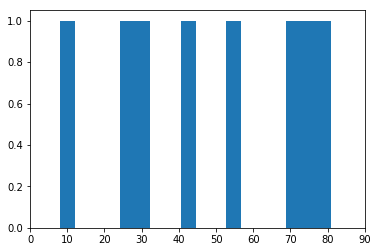

None


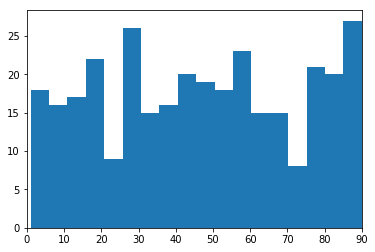

None


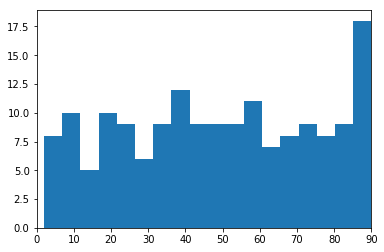

Bordeaux


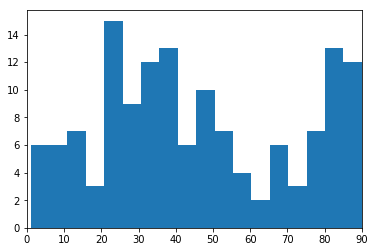

Saint-Etienne


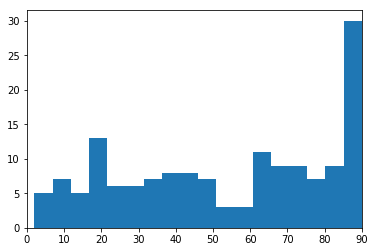

Hoffenheim


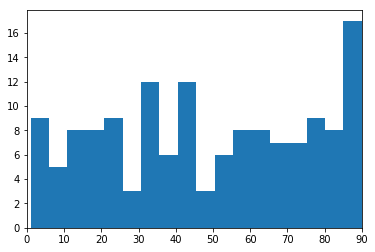

Bayer Leverkusen


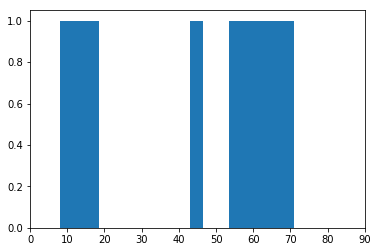

None


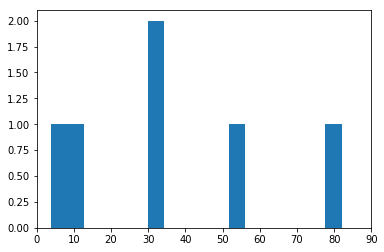

Bayer Leverkusen


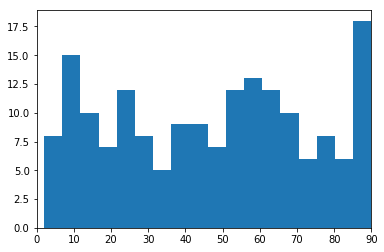

Hertha Berlin


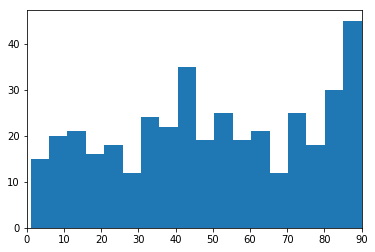

Ingolstadt


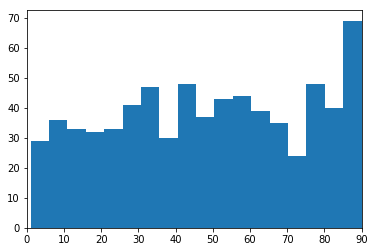

Werder Bremen


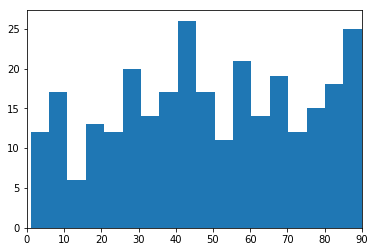

Borussia Moenchengladbach


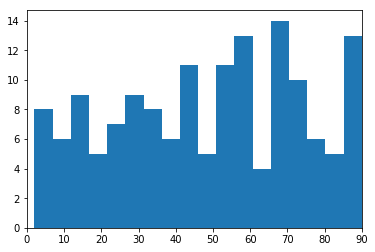

Borussia Dortmund


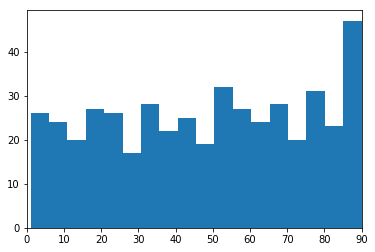

RasenBallsport Leipzig


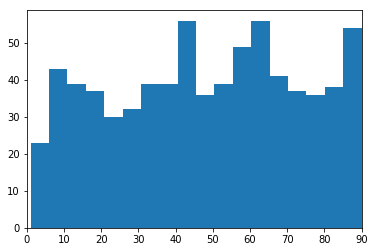

Wolfsburg


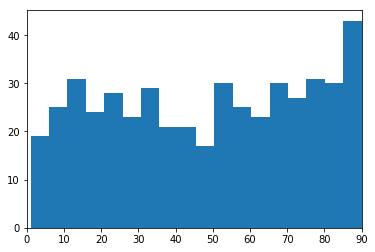

Eintracht Frankfurt


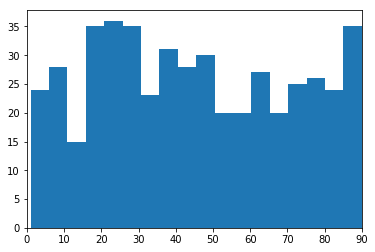

Mainz 05


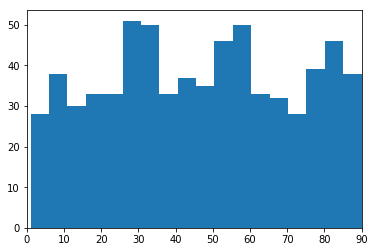

Mainz 05


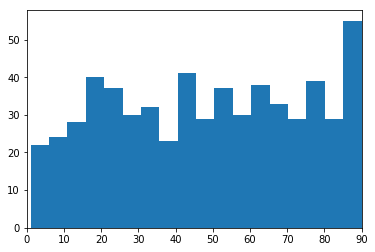

Augsburg


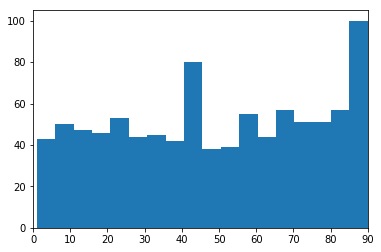

Freiburg


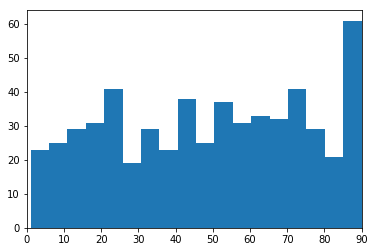

Hamburger SV


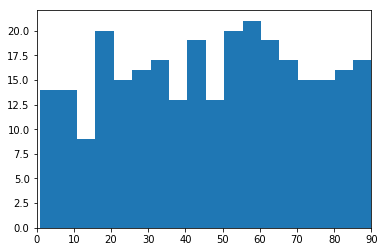

Eintracht Frankfurt


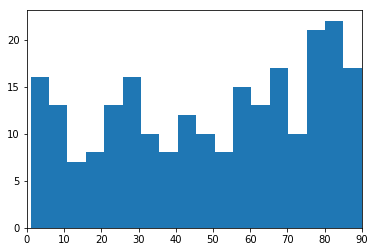

Eintracht Frankfurt


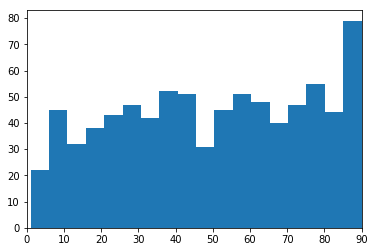

Bayer Leverkusen


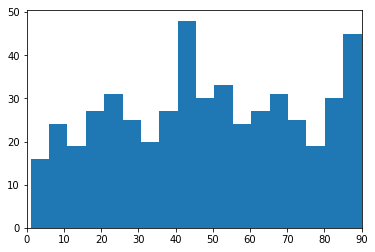

Hannover 96


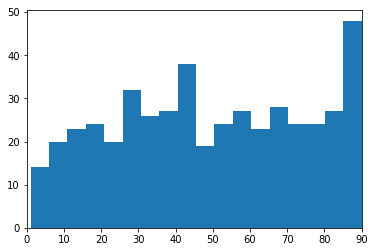

Hoffenheim


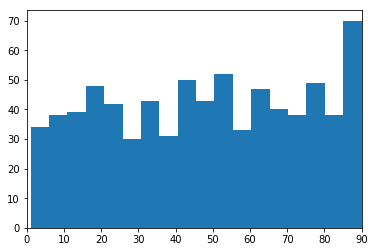

Borussia Dortmund


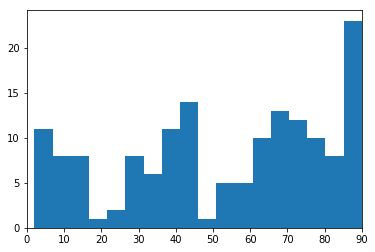

Augsburg


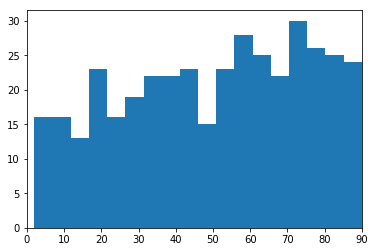

Werder Bremen


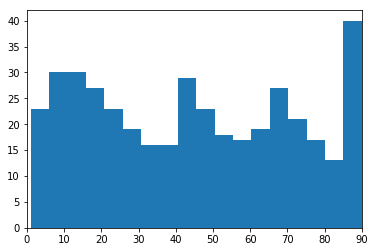

Augsburg


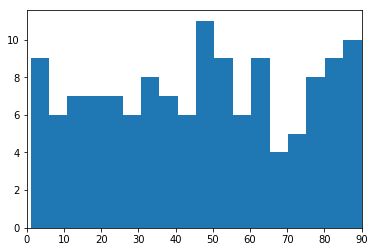

FC Cologne


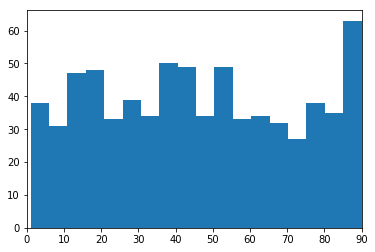

Hoffenheim


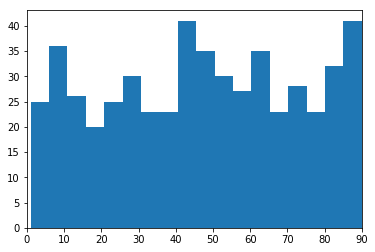

VfB Stuttgart


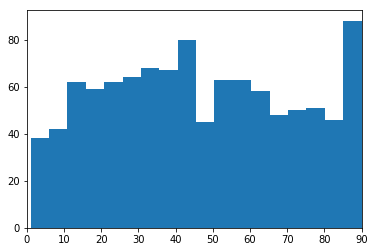

FC Cologne


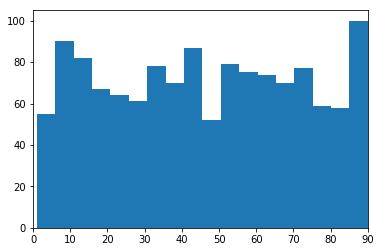

Freiburg


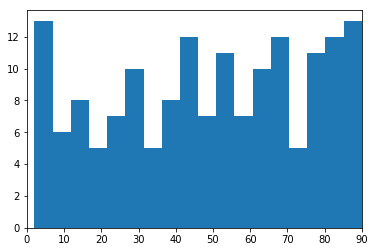

Hamburger SV


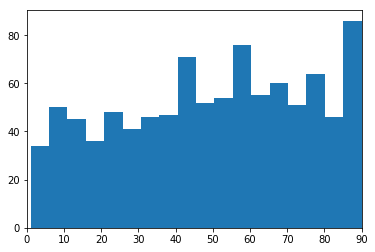

Bayern Munich


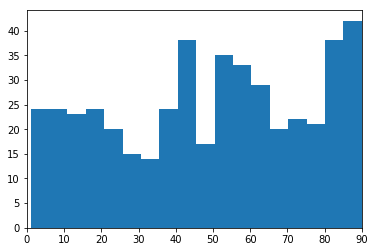

Schalke 04


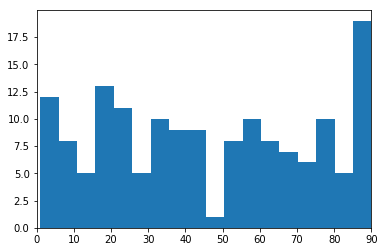

VfB Stuttgart


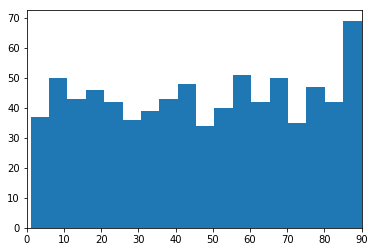

Wolfsburg


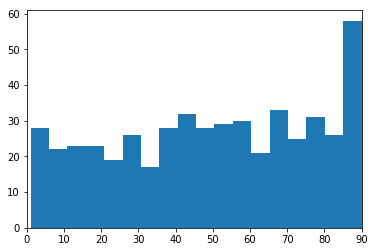

Borussia Moenchengladbach


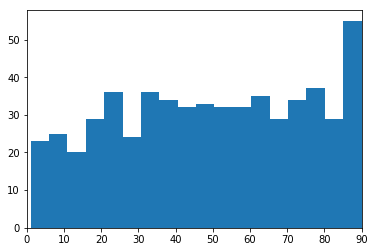

RasenBallsport Leipzig


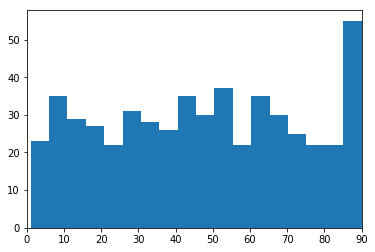

Bayern Munich


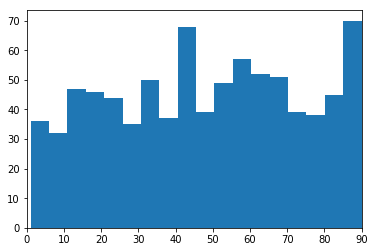

Eintracht Frankfurt


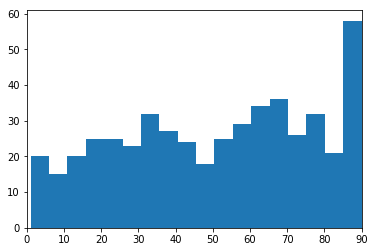

Werder Bremen


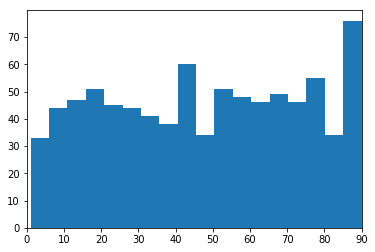

Borussia Dortmund


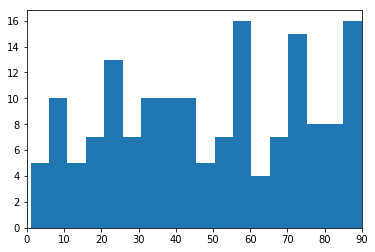

Eintracht Frankfurt


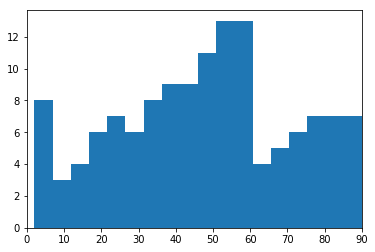

Borussia Moenchengladbach


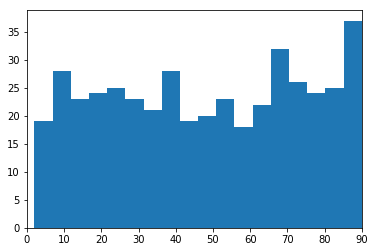

Hamburger SV


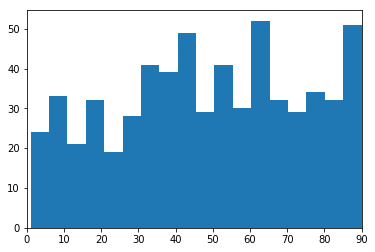

Wolfsburg


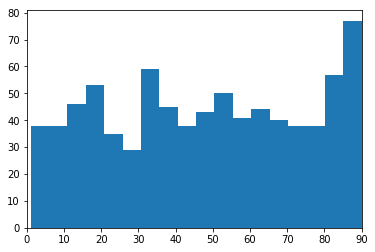

Hertha Berlin


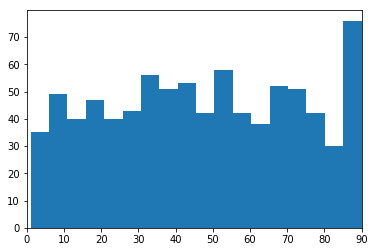

Hoffenheim


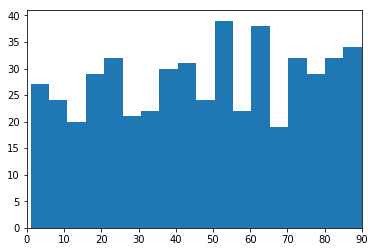

Eintracht Frankfurt


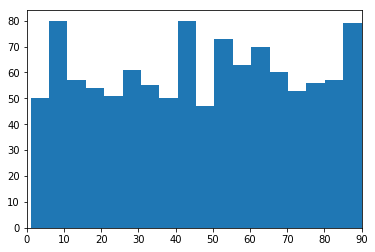

Wolfsburg


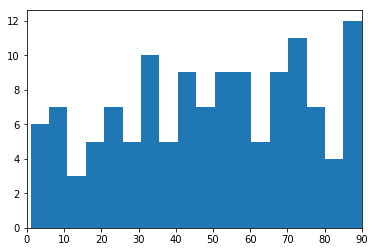

Borussia Moenchengladbach


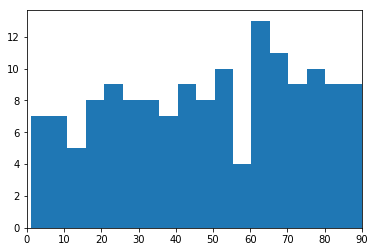

Hamburger SV


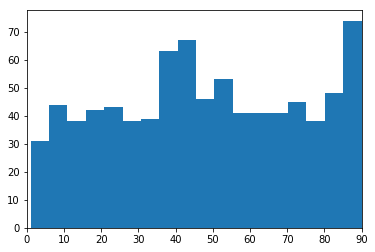

Hoffenheim


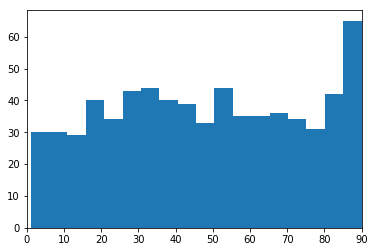

Hertha Berlin


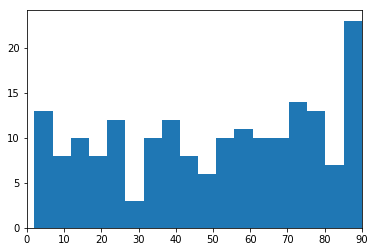

FC Cologne


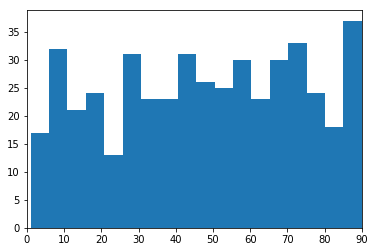

Borussia Dortmund


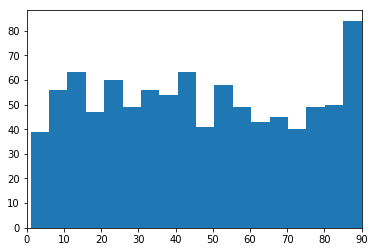

Hoffenheim


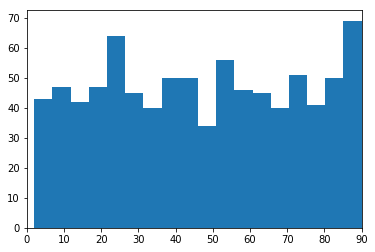

Hertha Berlin


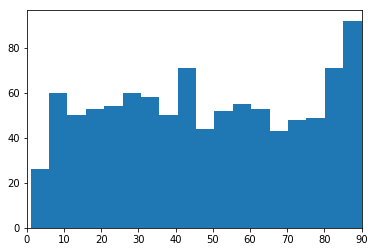

Eintracht Frankfurt


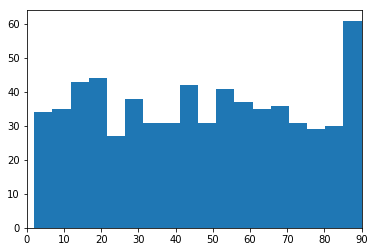

Borussia Dortmund


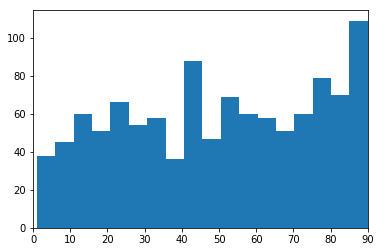

RasenBallsport Leipzig


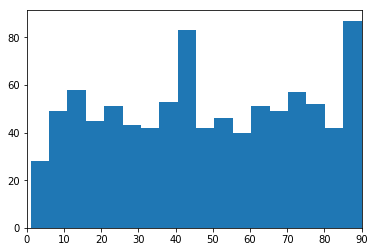

Freiburg


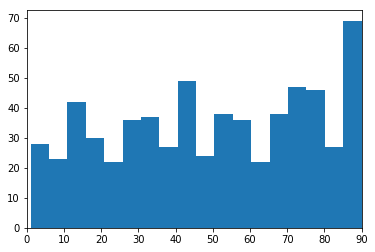

Eintracht Frankfurt


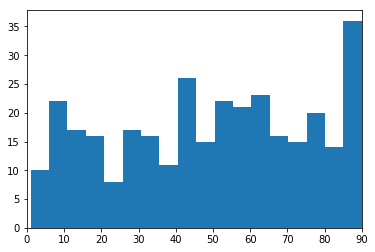

FC Cologne


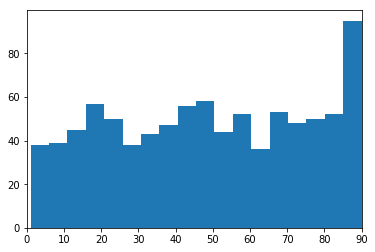

Augsburg


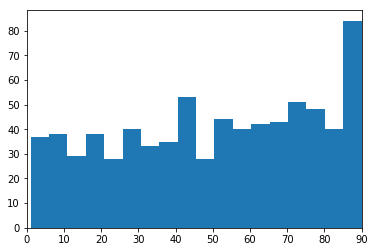

Bayern Munich


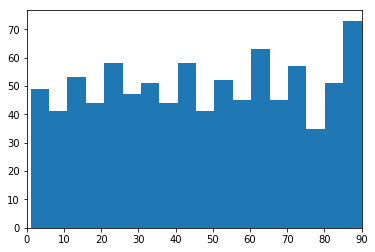

Eintracht Frankfurt


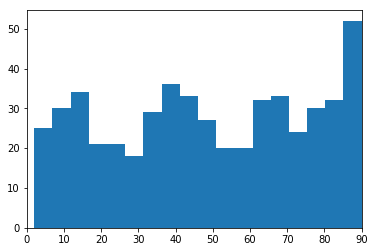

Hamburger SV


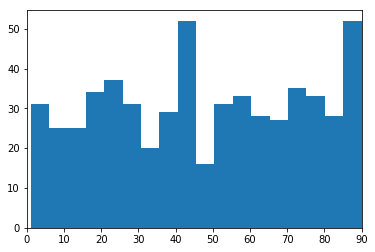

Freiburg


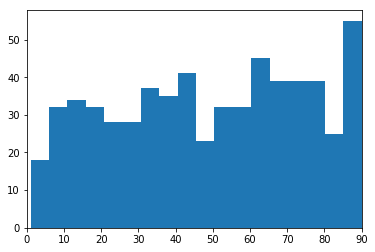

Bayern Munich


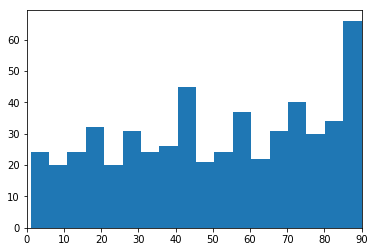

Fiorentina


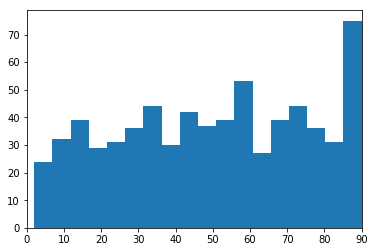

SSC Napoli


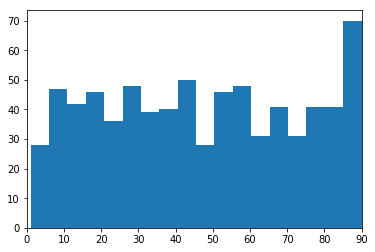

AC Milan


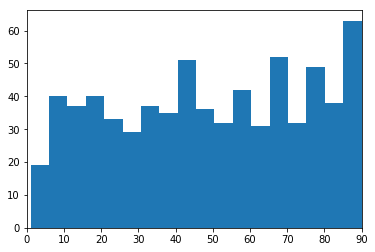

Verona


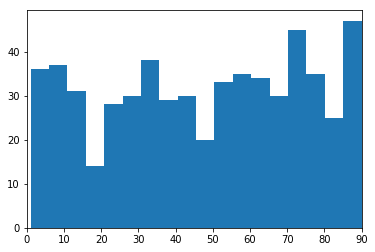

Roma


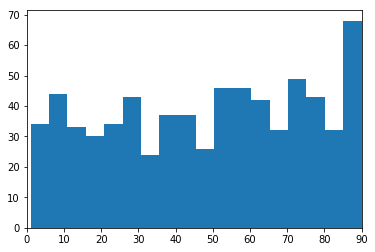

Inter


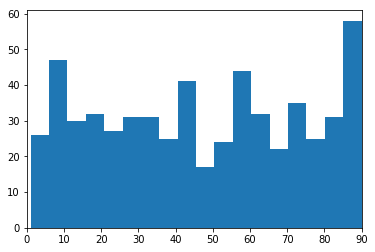

Sampdoria


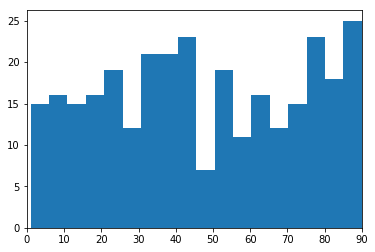

Carpi


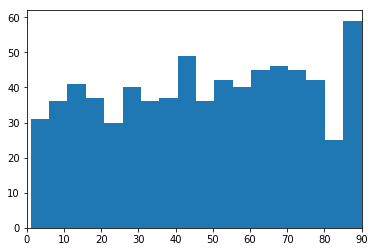

SSC Napoli


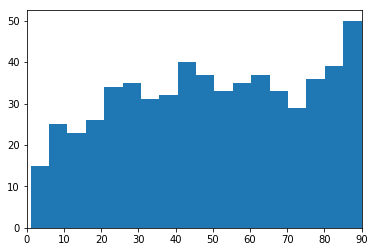

Fiorentina


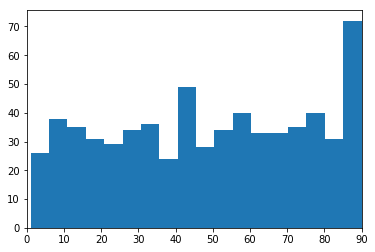

Genoa


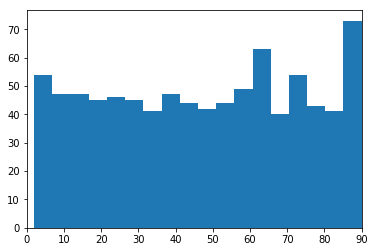

AC Milan


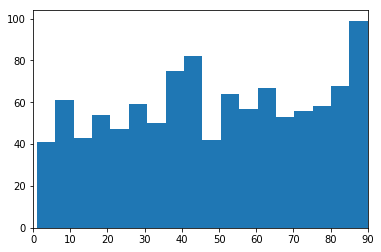

Frosinone


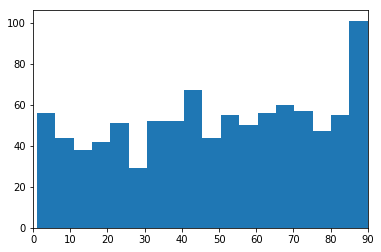

Roma


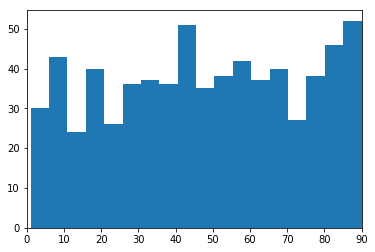

Torino


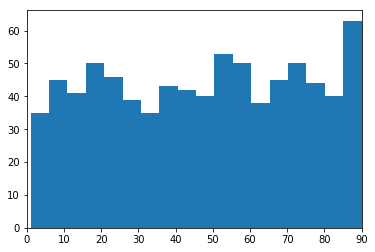

Sampdoria


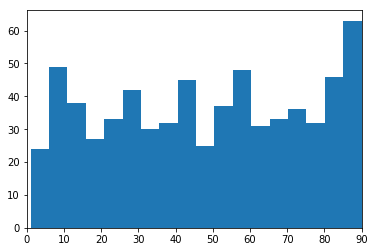

Bologna


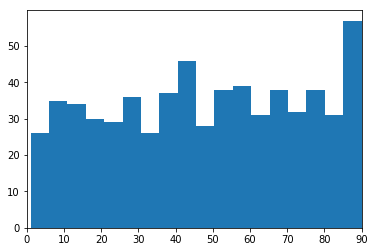

Lazio


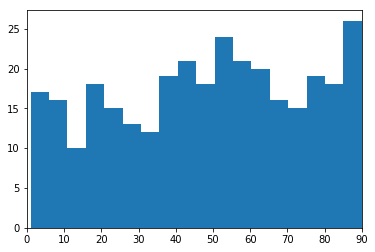

Udinese


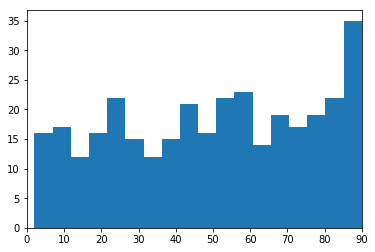

Juventus


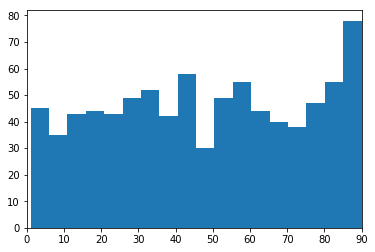

Chievo


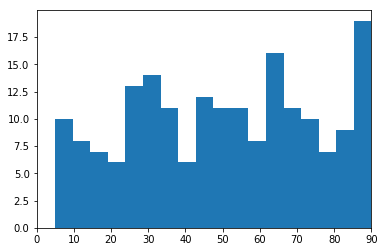

SSC Napoli


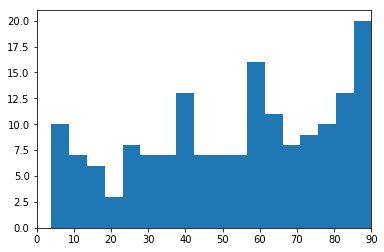

Lazio


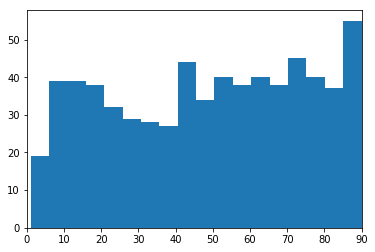

Palermo


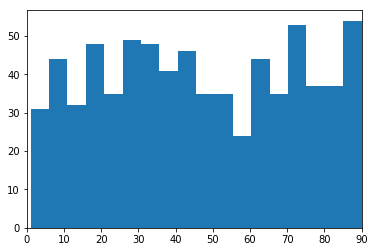

Sassuolo


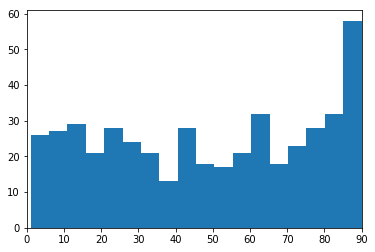

Fiorentina


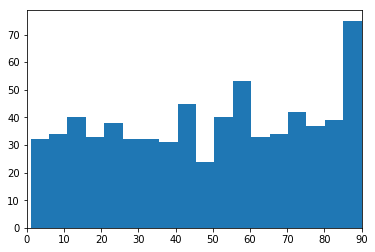

Bologna


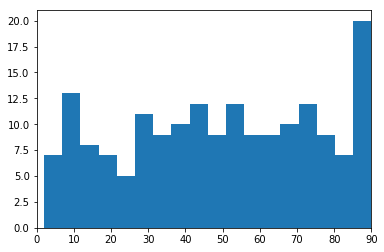

Empoli


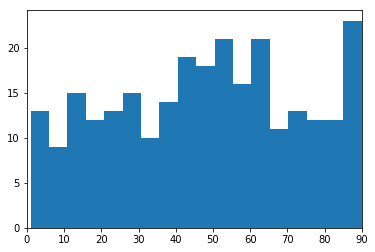

Frosinone


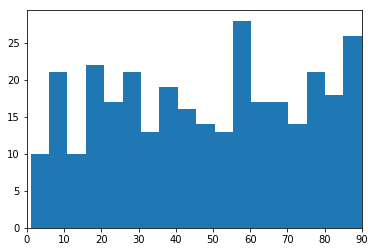

Verona


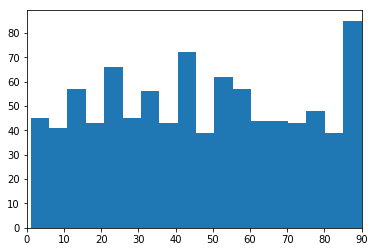

Sampdoria


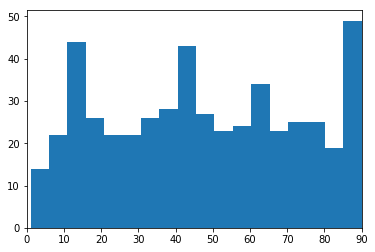

Bologna


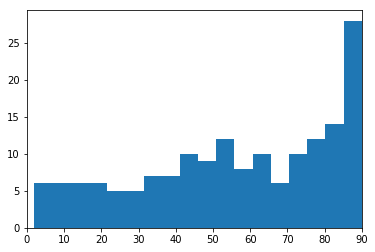

Udinese


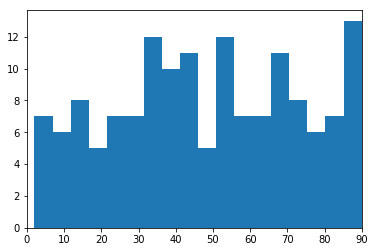

Atalanta


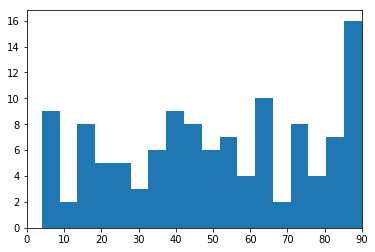

Udinese


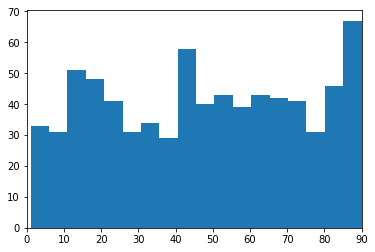

Genoa


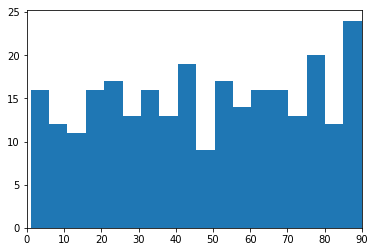

AC Milan


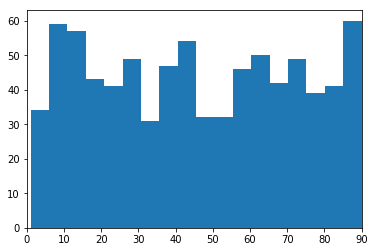

Lazio


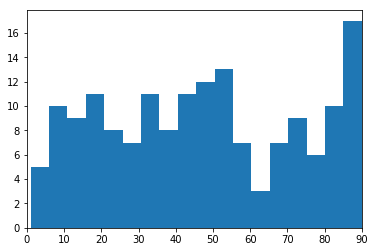

Empoli


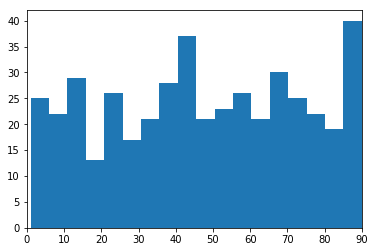

Sassuolo


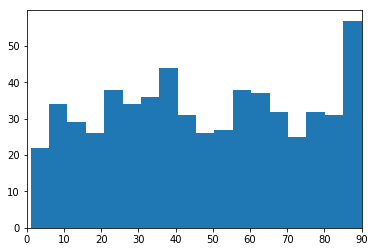

Fiorentina


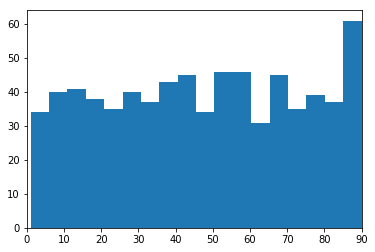

AC Milan


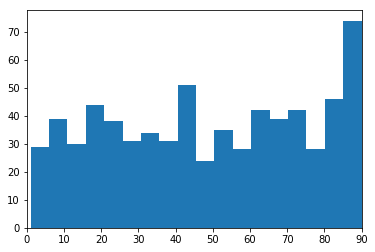

Bologna


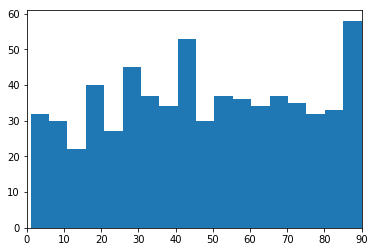

In [9]:
#Teams select
stmt = """SELECT  TeamId, MatchId, convert (bigint, minute  ) as Minute, count(*) as count, FullName
  FROM [FootballData].[dbo].[Corners] 
  LEFT JOIN [Teams] ON Corners.TeamId = Teams.Id
  group by convert (bigint, minute  ),TeamId, Teams.FullName, MatchId
  order by 1,2"""
# Excute Query here
df_teams_corners_per_minute = pd.read_sql(stmt,conn)
#with_competitions = pd.merge(df_teams_corners_per_minute.set_index("MatchId"), df_matches.set_index("ExternalId"),  how='left')
#result = goals[goals['Minute'].notnull()]
#print(goals.shape)
#cornes_minute_england = df_teams_corners_per_minute[(df_teams_corners_per_minute['League'] == 'Premier League') & (df_teams_corners_per_minute['Season'] == '2016/2017')]

print(df_teams_corners_per_minute.shape)
#df_teams_corners_per_minute.head()
groups = df_teams_corners_per_minute.groupby(['TeamId'])
print(groups.head())
df_teams_corners_per_minute.describe()
import matplotlib.pyplot as plt
for group in groups:
    #figure()
    #plt.
    print(group[1].FullName.values[0])
    plt.hist(group[1].Minute, bins=18)
    #cumulative=1, density=True, histtype='step'
    axes = plt.gca()
    axes.set_xlim([0,90])
    #axes.set_ylim([0,50])
    plt.show()
   
#hist = df_teams_corners_per_minute.hist(by='Minute')
##
#df_teams_corners_per_minute['Minute'].hist(by=df_teams_corners_per_minute['count'])
  

#for group in df_teams_corners_per_minute.groupby(['TeamId']).groups:

# import matplotlib.pyplot as plt
# import numpy as np
# import matplotlib.pyplot as plt
# df_teams_corners_per_minute.plot.hist()
# plt.show()
# plt.hist(df_teams_corners_per_minute, bins='auto')  # arguments are passed to np.histogram
# plt.title("Histogram with 'auto' bins")
# plt.show()
# for team in df_teams_corners_per_minute.groupby(['TeamId']).groups.values:
#     team.hist()

In [10]:
#for group in df_teams_corners_per_minute.groupby(['TeamId']).groups:

# import matplotlib.pyplot as plt
# import numpy as np
# import matplotlib.pyplot as plt
# df_teams_corners_per_minute.plot.hist()
# plt.show()
# plt.hist(df_teams_corners_per_minute, bins='auto')  # arguments are passed to np.histogram
# plt.title("Histogram with 'auto' bins")
# plt.show()
# for team in df_teams_corners_per_minute.groupby(['TeamId']).groups.values:
#     team.hist()

In [11]:
# goals = pd.merge(df_matches.set_index("ExternalId"), df_goals.set_index("MatchId"),  how='left')
# #result = goals[goals['Minute'].notnull()]
# print(goals.shape)
# #group by season
# premier_league = goals[(goals['League'] == 'Premier League') & (goals['Season'] == '2016/2017')]
# premier_league.head()

# premier_league['Minute'] = premier_league['Minute'].astype(int)
# #premier_league.loc[premier_league['Minute']] = premier_league['Minute'].astype(int)

# for number in range(0, 90, 10):
#     from_minute = number
#     to_minute = number + 10
#     goals_by_minute = premier_league.groupby(['TeamId'])['Minute'].apply(
#         lambda x: len(x.where(
#             lambda y : y > from_minute).where(lambda z:z < to_minute).dropna()))   
#     #print(goals)
#     #with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
#        # print(goals)
# #goals_teams = goa
# #len(teams.groups)
# premier_league.head(2)

In [12]:
result = pd.merge(df_matches.set_index("ExternalId"), df_corners.set_index("MatchId"),  how='left')
#premier_league = result[(result['Season']  == '2017/2018') & (result['League']  == 'Premier League')]
premier_league = result[ (result['Season'] == '2017/2018') & (result['League'] == 'Ligue 1')]
#print(result.shape)


#teams_coreners = df_corners.groupby('TeamId')
goal_matches = pd.merge(df_corners.set_index("MatchId"), df_matches.set_index("ExternalId"), how='right')

#goal_matches_home_team = pd.merge(goal_matches.set_index("HomeTeam_Id"), df_teams.set_index("ExternalId"), how='left')
#goal_matches_home_team.rename(columns={'FullName': 'FullNameHome'}, inplace=True)
#goal_matches_home_team.rename(columns={'Acronym': 'AcronymHome'}, inplace=True)
#goal_matches_home_team.rename(columns={'TeamId': 'HomeTeamId'}, inplace=True)
#goal_matches_home_team_away_team = pd.merge(goal_matches_home_team.set_index("AwayTeam_Id"), df_teams.set_index("ExternalId"), how='left')
#goal_matches_home_team_away_team
#goal_matches_home_team
result.head(2)
#goal_matches_home_team_away_team
#['Minute','TeamId'].apply(
#    lambda x: "{%s}" % ', '.join(x.Minute + ' ' + x.TeamId))
#minutes_sum = result.groupby(['TeamId'], as_index=True)['Minute']hg
#minutes_sum
#['Minute']
#minutes_sum = df_corners.groupby('MatchId')['MatchId', 'TeamId','Minute']
#print(premier_league[:10].head())
#print(result_premier_league_1718)
#premier_league_minutes = premier_league[premier_league['Minute'].notnull()]
#print(premier_league_minutes.shape)
#minutes_sum.first()
#print(list(premier_league_minutes.columns.values))

MergeError: No common columns to perform merge on

In [ ]:
goals = pd.merge( df_matches.set_index("ExternalId"), df_goals.set_index("MatchId"), how='left')
#result = goals[goals['Minute'].notnull()]
print(result.shape)
premier_league = goals[(goals['League'] == 'Premier League') & (goals['Season'] == '2016/2017')]
premier_league.head(2)

#premier_league['Minute'] = premier_league['Minute'].astype(int)
#premier_league.loc[premier_league['Minute']] = premier_league['Minute'].astype(int)

#premier_league['TeamId'].hist(by=premier_league['Minute'])

# for number in range(0, 90, 10):
#     from_minute = number
#     to_minute = number + 10
#     goals = premier_league.groupby(['TeamId'])['Minute'].apply(lambda x: len(x.where(lambda y : y > from_minute).where(lambda z:z < to_minute).dropna()))   
#     print(goals)
# #goals_teams = goa
# #len(teams.groups)

#print(teams.groups.keys())

In [ ]:
#groups = df_goals.groupby(['MatchId'])
#groups.groups.keys()
#df_goals.head()
minutes_sum = df_goals.groupby(['MatchId', 'TeamId',], as_index=True, sort=True)
#minutes_sum.last()
minutes_sum.count()
#print(minutes_sum.shape)
#df_goals.head(10)
#groups.groups['1709877']
#minutes_sum.groups
#result = minutes_sum.get_group(('1709702','9748'))

In [ ]:
def get_last_matches(date, team, x = 10):
    ''' Get the last x matches of a given team. '''
    
    #Filter team matches from matches
    team_matches = df_matches[(df_matches['HomeTeam'] == team) | (df_matches['AwayTeam'] == team)].drop_duplicates(['ExternalId'])
    team_matches['ExternalId'] = team_matches['ExternalId'].astype(int)
    #Filter x last matches from team matches
    last_matches = team_matches[team_matches.Date < date].sort_values(by = 'Date', ascending = False).iloc[0:x,:]

    #Return last matches
    return last_matches

last_matches = get_last_matches("2018-08-27 15:00:00", "Arsenal")
last_matches.head()


In [ ]:
matches_to_predict = pd.read_csv(data_folder + 'to_predict.csv')
matches_to_predict['Date']=pd.to_datetime(matches_to_predict['Date'])
matches_to_predict_with_stats = matches_to_predict.apply(lambda x: get_match_features(x, x = 10), axis = 1)
alldata = []
alldata.append(pd.concat([matches_to_predict, matches_to_predict_with_stats], axis=1))
data=pd.concat(alldata,axis=0)
data['IsTraining'] = False

previous_data = pd.read_csv(data_folder + '/data.csv')
data = previous_data.append(data)
data.to_csv(data_folder + '/predict_stats.csv',index=False)